In [13]:
from algorithms.REINFORCE import Reinforce
%matplotlib inline
import gymnasium as gym
import highway_env
from matplotlib import pyplot as plt

# Controls:
CONTINUOUS_ACTIONS = False
TESTING = False
EPOCHS = 150
EPISODES = 15
STEP_W = 1e-3
STEP_T = 0.006
DISCOUNT = 0.85
configs = f"{"TEST" if TESTING else "DRIVE"}_{"CON" if CONTINUOUS_ACTIONS else "DIS"}_{EPOCHS}_{EPISODES}_{STEP_W}_{STEP_T}_{DISCOUNT}"
###########

if CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
elif CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-fast-v0', config={"action": {"type": "ContinuousAction"}}, render_mode='rgb_array')
elif not CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("CartPole-v1", render_mode="rgb_array")
elif not CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-fast-v0', render_mode='rgb_array')
else:
    print("invalid controls, aborting...")
    quit()

urs_lst = []
ars_lst = []

model = Reinforce(env, epochs=EPOCHS, episodes_per_epoch=EPISODES, step_size_w=STEP_W, step_size_theta=STEP_T, discount=DISCOUNT)
ur, ar = model.learn(verbose=True)
urs_lst.append(ur)
ars_lst.append(ar)
env.reset()
print("Training complete.")

Epoch: 1, Average Reward: 5.91
Epoch: 2, Average Reward: 6.91
Epoch: 3, Average Reward: 8.34
Epoch: 4, Average Reward: 6.99
Epoch: 5, Average Reward: 7.37
Epoch: 6, Average Reward: 6.65
Epoch: 7, Average Reward: 5.23
Epoch: 8, Average Reward: 8.61
Epoch: 9, Average Reward: 7.03
Epoch: 10, Average Reward: 8.20
Epoch: 11, Average Reward: 8.25
Epoch: 12, Average Reward: 7.03
Epoch: 13, Average Reward: 8.94
Epoch: 14, Average Reward: 7.68
Epoch: 15, Average Reward: 7.24
Epoch: 16, Average Reward: 7.15
Epoch: 17, Average Reward: 6.62
Epoch: 18, Average Reward: 8.06
Epoch: 19, Average Reward: 12.30
Epoch: 20, Average Reward: 8.43
Epoch: 21, Average Reward: 7.74
Epoch: 22, Average Reward: 8.30
Epoch: 23, Average Reward: 9.27
Epoch: 24, Average Reward: 7.20
Epoch: 25, Average Reward: 9.74
Epoch: 26, Average Reward: 7.85
Epoch: 27, Average Reward: 8.06
Epoch: 28, Average Reward: 5.94
Epoch: 29, Average Reward: 8.60
Epoch: 30, Average Reward: 8.75
Epoch: 31, Average Reward: 7.63
Epoch: 32, Avera

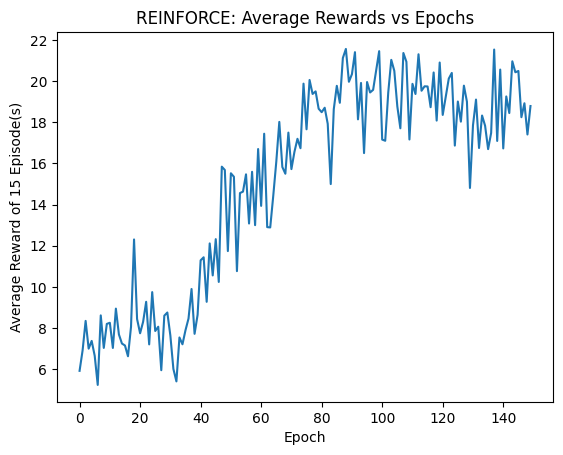

In [14]:
plt.plot(ars_lst[0])
plt.title(f"REINFORCE: Average Rewards vs Epochs")
plt.xlabel("Epoch")
plt.ylabel(f"Average Reward of {EPISODES} Episode(s)")
plt.show()

In [15]:
from gymnasium.wrappers import RecordVideo
import datetime
dt = datetime.datetime.now()
# Define class to record test output runs
env = gym.make('highway-v0', config={"duration":120}, render_mode='rgb_array')
env = RecordVideo(env, video_folder="videos/", episode_trigger=lambda e: True, name_prefix=f"vpg_{configs}")
# Evaluation loop, deterministically stepping in our environment to test our learned actor policy
for episode in range(5):
    obs, info = env.reset()
    done = truncated = False
    score = 0
    while not (done or truncated):
        action, _ = model.predict(obs)
        next_obs, reward, done, truncated, info = env.step(action)
        obs = next_obs
        score += reward
    print(f"Recorded Episode {episode+1}: Score = {score:.2f}")
env.close()
print("Videos saved to 'videos/' folder.")

C:\Users\carey\AppData\Local\Programs\Python\Python313\Lib\site-packages\gymnasium\wrappers\rendering.py:293: UserWarning: WARN: Overwriting existing videos at C:\Users\carey\OneDrive\Desktop\Work\Uni\Year 3\Reinforcement Learning\Coursework1\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Recorded Episode 1: Score = 19.56
Recorded Episode 2: Score = 6.22
Recorded Episode 3: Score = 12.00
Recorded Episode 4: Score = 1.67
Recorded Episode 5: Score = 16.80
Videos saved to 'videos/' folder.


In [16]:
import numpy as np
import os
path = f"save_data_{configs}"
os.makedirs(path, exist_ok=True)
rewards_path = os.path.join(path, "reinforce_average_rewards.csv")
with open(rewards_path, "w") as f:
    pass
np.savetxt(rewards_path,
        np.column_stack((np.arange(len(ar)), ar)),
        delimiter=",",
        header="episode,reward",
        comments="")
rewards_path = os.path.join(path, "reinforce_undiscounted_rewards.csv")
with open(rewards_path, "w") as f:
    pass
np.savetxt(rewards_path,
        np.column_stack((np.arange(len(ur)), ur)),
        delimiter=",",
        header="episode,reward",
        comments="")